In [17]:
from src import data
import matplotlib.pyplot as plt
from scipy import stats
import torch
from src.variational_gpt import GPT2ModelWithVI
from transformers import GPT2TokenizerFast
import seaborn as sns

In [5]:
model = GPT2ModelWithVI.from_pretrained("rnn_vae/")
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

In [9]:
outputs = model(**tokenizer(["body", "return"], return_tensors="pt"))

In [63]:
mu = outputs.mu[0][0][:10]
logsigma = outputs.logsigma[0][0][:10]

In [65]:
x = mu + torch.randn(10000, 10) * logsigma.exp()
x = x.detach().numpy()

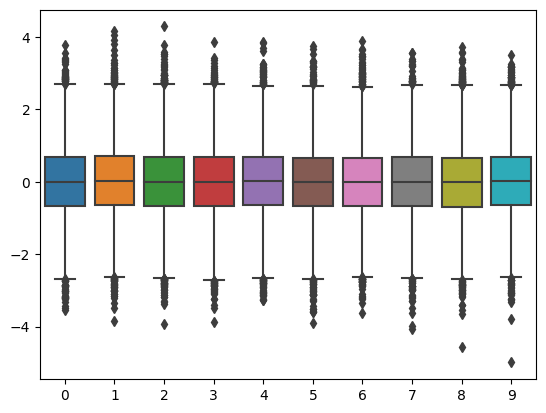

In [66]:
sns.boxplot(x);
    #plt.vlines(mu[xi].detach().numpy(), 0, .5)